<div style="text-align: center">
    
##  Machine Learning with Iris Dataset 
    
</div>

<div style="text-align: center;">
    <img src="iris.jpeg" alt="iris" />
</div>

In [587]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import datasets
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score



### Preview of Data
<br>

In [560]:
# Loading the data
iris = datasets.load_iris()
iris

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [562]:
data = pd.DataFrame(data=iris.data,
                     columns= iris.feature_names)

data['target'] = iris.target
data['target'] = data['target'].apply(lambda x:iris.target_names[x])
data.head(5)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [564]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   target             150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [566]:
data['target'].value_counts()

target
setosa        50
versicolor    50
virginica     50
Name: count, dtype: int64

In [568]:
# Statistiical summary

data.describe().round(2)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.00,150.00,150.00,150.00
mean,5.84,3.06,3.76,1.20
std,0.83,0.44,1.77,0.76
min,4.30,2.00,1.00,0.10
25%,5.10,2.80,1.60,0.30
50%,5.80,3.00,4.35,1.30
75%,6.40,3.30,5.10,1.80
max,7.90,4.40,6.90,2.50


#### Interpretation 
<br>
There are 150 observations, 4 attributes (sepal length, sepal width, petal length, petal width). <br>
There are 50 observations of each 3 species (setosa, versicolor, virginica).<br>
There are no null values.<br>
<br>
The mean of the sepal length is 5.84 cm, and the range is 4.3 - 7.9.<br>
The mean of the sepal width is 3.06 cm, and the range is 2 - 4.4.<br>
The mean of the petal length is 3.76 cm, and the range is 1 - 6.9.<br>
The mean of the petal width is 1.2 cm, and the range is 0.1 - 2.5.<br>
<br>
<br>
<br>


### Data visualisation
<br>

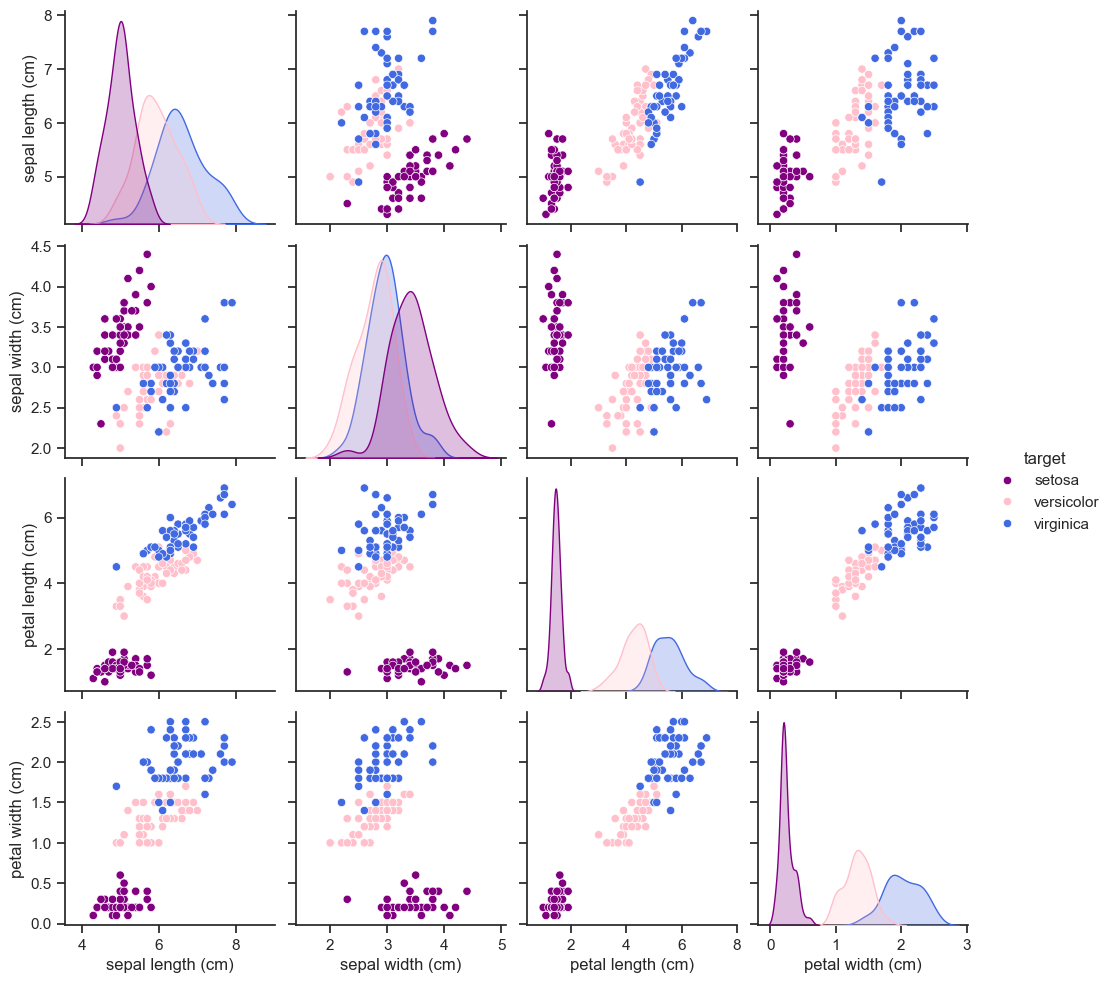

In [570]:
sns.set(style = 'ticks')
sns.pairplot(data,
                hue = 'target',
                palette = ('purple','pink','royalblue'))

#### Interpretation 
<br>
The setosa species stands out from the others, the observations of the setosa species clearly form a group in the scatter diagrams, especially for the variables petal lenght and petal width.<br>
<br>
<br>
<br>

### Data Modeling
<br>
Classification problem: The goal is to predict the species (setosa, versicolor, virginica) with 4 features: sepal length, sepal width, petal length, petal width.<br>
<br>

In [572]:
# Split the data into a training set and a testing set
x = iris.data
y = iris.target

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.4, random_state=20)

print('Size of the training set (X_train):', X_train.shape)
print('Size of the test set (X_test):', X_test.shape)

Size of the training set (X_train): (90, 4)
Size of the test set (X_test): (60, 4)


In [574]:
# Data standarisation
sc = StandardScaler()

sc.fit(X_train)

X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

<br>
<br>

### Model results
<br>
<br>

#### Logistic Regression
<br>

In [576]:
logreg = LogisticRegression()

logreg.fit(X_train_std, y_train)

y_pred = logreg.predict(X_test_std)

y_pred

array([0, 1, 1, 2, 1, 1, 2, 0, 2, 0, 2, 1, 1, 0, 0, 2, 0, 1, 2, 1, 1, 2,
       2, 0, 1, 1, 1, 0, 2, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 2, 1, 1, 0, 1,
       1, 0, 0, 0, 2, 0, 2, 2, 0, 2, 1, 1, 1, 0, 0, 1])

In [591]:
print('Accuracy with Logistic Regression is', (accuracy_score(y_test, y_pred)*100).round(2),'%')

print('Confusion Matrix:')
print(confusion_matrix(y_test, y_pred))

print("Classification Report:")
print(classification_report(y_test, y_pred))

Accuracy with Logistic Regression is 95.0 %
Confusion Matrix:
[[20  0  0]
 [ 0 22  0]
 [ 0  3 15]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        20
           1       0.88      1.00      0.94        22
           2       1.00      0.83      0.91        18

    accuracy                           0.95        60
   macro avg       0.96      0.94      0.95        60
weighted avg       0.96      0.95      0.95        60



<br>
Logistic Regression: 93% of observations were classified correctly
<br>
<br>


#### KNeighborsClassifier
<br>

In [582]:
kNN = KNeighborsClassifier()

kNN.fit(X_train_std, y_train)

y_pred = kNN.predict(X_test_std)

y_pred

array([0, 1, 1, 2, 1, 1, 2, 0, 2, 0, 2, 1, 1, 0, 0, 2, 0, 1, 2, 1, 1, 2,
       2, 0, 1, 1, 1, 0, 2, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 2, 1, 2, 0, 1,
       1, 0, 0, 0, 2, 0, 2, 2, 0, 2, 1, 1, 1, 0, 0, 1])

In [589]:
print('Accuracy KNeighborsClassifier is', (accuracy_score(y_test, y_pred)*100).round(2),'%')

print('Confusion Matrix:')
print(confusion_matrix(y_test, y_pred))

print("Classification Report:")
print(classification_report(y_test, y_pred))

Accuracy KNeighborsClassifier is 95.0 %
Confusion Matrix:
[[20  0  0]
 [ 0 22  0]
 [ 0  3 15]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        20
           1       0.88      1.00      0.94        22
           2       1.00      0.83      0.91        18

    accuracy                           0.95        60
   macro avg       0.96      0.94      0.95        60
weighted avg       0.96      0.95      0.95        60



<br>
KNeighborsClassifier: 95% of observations were classified correctly
<br>
<br>